In [1]:
#Harmanjeet Singh
# import modules
import tweepy as tw
import pandas as pd

import matplotlib.pyplot as plt 
from nltk.stem import SnowballStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Access Keys for Twitter API

ACCESS_TOKEN = '1395722217938427912-rRQCwmXAxLL6B3ABer4gRRg0dGRmbT'
ACCESS_TOKEN_SECRET = '9HKZ06ku18sRZcEpOAvqprC4uqVBJBtTMEj4NUMP58S23'
CONSUMER_API_KEY = 'XQSQuCSAtChE6Qe47Gdlmell7'
CONSUMER_API_SECRET = 'hiePjJJx5NRez8PtCOJkiCTuxtFcRigUZriwDqW4LfRn1KO1CS'

auth = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth)


In [8]:
### Function to Get the Tweets and save it in .csv File 
def tweetcount(hashtag,date,numbers,fname):
    db = pd.DataFrame(columns=['username',  'tweetid',
                               'time', 'text'])
    words=hashtag
    date_since=date
    numtweet=numbers
    filename = fname
    tweets = tw.Cursor(api.search, q=words, lang="en",
                           since=date_since, tweet_mode='extended').items(numtweet)
       
    list_tweets = [tweet for tweet in tweets]
    ## Frame for the Data 
    db = pd.DataFrame(columns=['username',  'tweetid',
                               'time', 'text'])
    for tweet in list_tweets:
        username = tweet.user.screen_name
        tweet_id=str(tweet.user.id)
        time = tweet.created_at.date()
        
          
        
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, tweet_id,
                     time, text]
        db.loc[len(db)] = ith_tweet

        
    # we will save our database as a CSV file.
    db.to_csv(filename)
    # Read the .csv File
    df = pd.read_csv(filename)



## Cleaning the twets (Stemming, stop Words, Punctuation)
    stemmer_s = SnowballStemmer("english")
    stop_nltk = stopwords.words("english")
    def clean_txt(sent):
        tokens = word_tokenize(sent.lower())
        stemmed = [stemmer_s.stem(term) for term in tokens \
               if term not in stop_nltk and \
                term not in list(punctuation) and\
               len(term) > 2] 
        res = " ".join(stemmed)
        return res





    df['text_clean'] = df.text.apply(clean_txt)
    tweet_count=df.groupby('time')['text_clean'].count()
    tweet_count.plot(kind='bar',color='red',figsize=(5,3))
    plt.title(hashtag)
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.show()

Enter Date since The Tweets are required in yyyy-mm--dd
"2021-06-06"
Enter No. of Tweets 
30


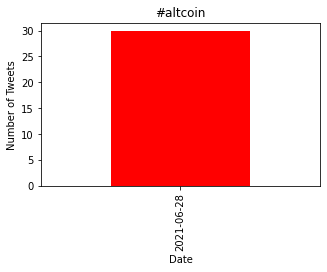

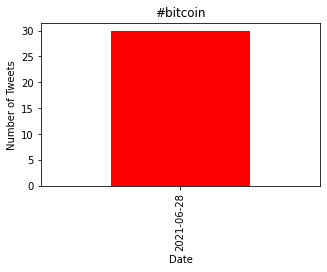

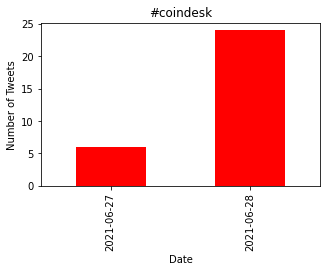

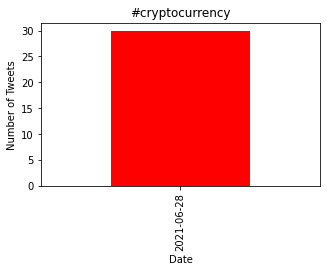

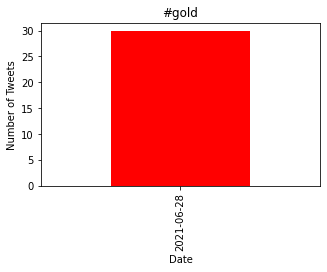

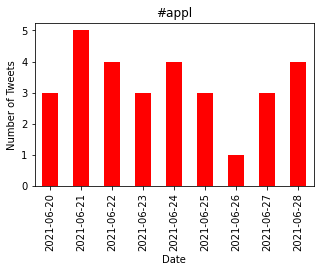

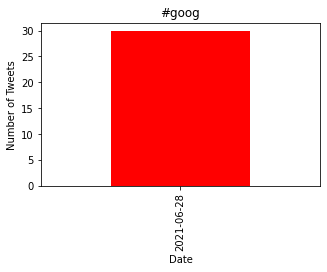

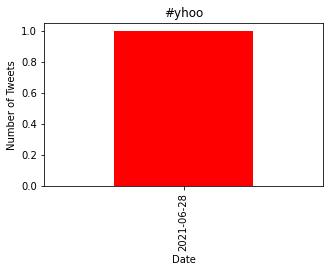

In [9]:
# List of hashtags 
tweet_list = ["altcoin","bitcoin","coindesk","cryptocurrency","gold","appl","goog","yhoo"]

## Input for the date since the tweets we want get 
print("Enter Date since The Tweets are required in yyyy-mm--dd")
date = input()

##### Input no. of tweets we want to get
print("Enter No. of Tweets ")
num = input()
num=int(num)

## Callinng the function for the List
for word in tweet_list:
    tweetcount("#"+word,date,num,word+".csv")